In [ ]:
from IPython.display import Image, Audio, display
from time import sleep
import os
import types
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
from pydub import AudioSegment
import threading
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [14]:
def nota(note):
    names = ['A', 'Bb', 'B', 'C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#']
    freq = [440, 466, 494, 523, 554, 587, 622, 
        659, 698, 740, 784, 831]
    nota = {k:v for k,v in zip(names, freq)}
    return nota[note]

In [30]:
def play(freq, s, A = 1):
    framerate =  44100
    t = np.linspace(0, s, framerate*s)
    d = A * np.cos(2*np.pi*freq*t)
    return d

In [16]:
def armonia(acordes, secs = []):
    total = np.array([])
    n = 0
    for acorde in acordes:
        fund = acorde[0]
        modo = acorde[1:]
        notes = ['A', 'Bb', 'B', 'C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#']
        ind = notes.index(fund)
        notas = [n for n in (notes +notes+notes)[ind:]]  
        
        modos = {'maj': [0, 4, 7], 'min':[0, 3, 7], 'mb5m7': [0, 3, 6, 10], 
                 'maj7':[0,4,7,11], 'm7':[0,3,7,10], '7': [0,4,7,10], 
                 'b5b7' : [0,3,6,9], '7b9' : [0,4,7,14]}
        chord = [nota(notas[i]) for i in modos[modo]]
        framerate = 44100
        t = np.linspace(0, secs[n], framerate*secs[n])
        A = 1
        fase = 0
        y = t.copy()        
        f = lambda t: A * np.cos(omega*t + fase)
        for note in chord:
            omega = 2*np.pi*note
            y += f(t)
        n += 1
        total = np.append(total, y)
    return total

In [17]:
def melodia(notas, n, compas = 4,):
    framerate = 44100
    figs = [1/8, 1/4, 1/2, 1]
    onda = np.array([])
    melo = np.array([])
    l = []
    for c in range(n):
        c = []
        while sum(c) < compas:
            l_ = np.random.choice([fig for fig in figs if fig + sum(c) <= compas])
            c.append(l_)
            l.append(l_)
    for fig in l:
        if np.random.choice([True, True, True, True, False]):
            freq = nota(np.random.choice(notas))
            onda = np.append(onda, play(freq, fig))
            melo = np.append(melo, [freq] * int(framerate*fig))
        else:
            onda = np.append(onda, play(0, fig))
            melo = np.append(melo, [0] * int(framerate*fig))

    fig, axes = plt.subplots(figsize = (15, 4))
    axes.scatter(np.linspace(0, compas * n, len(melo)//(framerate//16) + 1), melo[::framerate//16])
    axes.set_xlim(0, compas*n)
    axes.set_ylim(min(melo) + 400, max(melo) + 100)
    axes.grid(True)
    axes.set_xticks(np.arange(0, compas * n, 1)) 
    return onda

$${\displaystyle \sum _{n=0}^{N}a_{n}(\alpha \cos(\omega t+\phi ))^{n}}$$

In [18]:
def bateria(n, A=5, compas = 4):
    framerate =  44100
    l = []
    t = 0.01
    A = 2
    tot = np.array([])
    bombos, tachos, rides = np.array([]), np.array([]), np.array([]) 
    for n in range(1, n+1):
        c = []
        while sum(c) < compas:
            freq = np.random.choice([80, 400])
            l_ = np.random.choice([1/8, 1/8, 1/4, 1/4, 1/2])
            c.append(l_)
            l.append(l_)
            pum = np.linspace(sum(l), sum(l) + t, framerate*t)
            sil = np.linspace(sum(l) + t, sum(l) + l_, framerate*(l_-t))
            bombo = np.random.choice([0,1])
            tacho = np.random.choice([0,1])
            ride = np.random.choice([0,1,1])
            golpe = sum([bombo * 2 * A * np.cos(np.pi*80*pum), 
                         A * tacho * np.cos(4*np.pi*250*pum),
                         A * ride * np.cos(4*np.pi*700*pum)])
            #:P
            silencio = 0 * np.cos(2*np.pi*freq*sil)
            tot = np.concatenate((tot, golpe, silencio))
            bombos = np.concatenate((bombos, [bombo]*len(pum), silencio))
            tachos = np.concatenate((tachos, [tacho]*len(pum), silencio))
            rides = np.concatenate((rides, [ride]*len(pum), silencio))
            
    #print(len(bombos), len(tachos), len(rides), compas*n*framerate, len(tot))
    fig, axes = plt.subplots(figsize = (15, 4))
    bombos[bombos == 0] = np.nan
    tachos[tachos == 0] = np.nan
    rides[rides == 0] = np.nan
    axes.scatter(np.linspace(0, compas*n, len(tot)), bombos * -1, color = 'r', marker = 'D')
    axes.scatter(np.linspace(0, compas*n, len(tot)), tachos, color = 'y', marker = '.')
    axes.scatter(np.linspace(0, compas*n, len(tot)), rides * 2, color = 'b', marker = '^')
    axes.set_xlim(0, compas*2)
    axes.set_xticks(np.arange(0, compas * 2, 1/4)) 
    axes.set_ylim(-2, 3)

    return tot

In [19]:
def sinte_loco(freq = 440, secs = [], autoplay = True):    
    total = np.array([])
    fig, axes = plt.subplots(figsize = (15, 4))
    fs = []
    for i in range(len(secs)):
        s = secs[i]
        framerate = 44100
        A = 0.3
        fase = 1/5
        omega = 2*np.pi*freq
        
        t = np.linspace(0, s, framerate*s)
        f0 = lambda t: A * np.cos(omega*t + fase)
        f1 = lambda t: np.sin(t)*(t**(1/2))
        f2 = lambda t: np.sin(t) + np.cos(t)
        f3 = lambda t: t ** 2
        f4 = lambda t: np.sin(t*3)
        f5 = lambda t: np.sin(t+5**t)
        f6 = lambda t: np.sin(2**(t/2))
        f7 = lambda t: np.sin(t+5**np.sin(t))
        f8 = lambda t: np.sinh(t**(1/2))
        f9 = lambda t: np.sinh(np.log(t+1))
        #f10 = lambda t: t**8+t**7+t**6+t**5+t**4+t**3+t**2+t
        
        funcs = [f for f in re.findall('f\d+', str(locals()))]
        random_func = np.random.choice(funcs)      
        fs.append(random_func)
        t = eval(random_func)(t)
        d = 0

        a = range(np.random.randint(1, 20)) #np.random.choice([0,1])
        for n in a:
            d += np.sin(t) * A * np.cos(omega*(t**n) + fase)**n
        
        total = np.concatenate((total, d))       
        axes.plot(np.linspace(sum(secs[:i]), sum(secs[:i+1]), framerate*s), d)
        
    axes.set_xlim(0, sum(secs))
    axes.set_ylim(np.min(total), np.max(total))
    axes.grid(True)
    axes.grid(True)
    secs = [int(n) for n in secs]
    plt.xticks([sum(secs[:i]) for i in range(len(secs))] + [n for n in range(10, sum(secs), 10)], fs + [n for n in range(10, sum(secs), 10)], fontsize = 12)

    return total

In [20]:
def zapar(**kwargs):
    if 'instrumentos' not in kwargs:
        instrumentos = input().split(',')
    else:
        instrumentos = kwargs['instrumentos']
    
    if 'progresion' not in kwargs:
        kwargs['progresion'] = ['Am7', 'Bmb5m7', 'E7b9', 'Gmaj7', 'Fb5b7']
    if 'escala' not in kwargs:
        kwargs['escala'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    
    ch = lambda x: np.random.choice([1/4, 1/2, 1, 2, 4, 6, 8], x)

    parametros = {'bateria': (5,4), 'armonia' : (kwargs['progresion'], ch(len(kwargs['progresion']))), 
                  'sinte_loco':(440, ch(40)), 'melodia': (kwargs['escala'], 4)}

    banda = [eval(i)(*parametros[i]) for i in instrumentos]    
    #sinte = synth(440, np.random.randint(4, 10, np.random.randint(3, 10)))
    #bata = bateria(5,4)
    #melo = random_mel(Gjonico, 10)
    #progresion = [np.random.choice(Cjonico) + np.random.choice(tipos) for n in range(np.random.randint(2, 12))]
    #progresion = C_arm
    #armonia = np.concatenate([np.array(chord(acorde, np.random.randint(2, 7))) for acorde in progresion])
    largos = [len(i) for i in banda]
    max_ind = largos.index(max(largos))
    min_ind = largos.index(min(largos))

    audio = sum([instr[:min(largos)] for instr in banda])
    audio = Audio(audio, rate = 44100, autoplay= True)
    display(audio)
    plt.show()
    return audio

In [21]:
def limiter(onda):
    max_value = np.mean(onda) + 1*np.std(onda)
    while np.max(np.absolute(onda)) > max_value:
        onda[np.absolute(onda) > np.mean(onda) + 2*np.std(onda)] *= 1/3 
    return onda

In [22]:
def scale(tone, name):
    Cjonico = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    Gjonico = ['A', 'B', 'C', 'D', 'E', 'F#', 'G']
    A_fea = ['A', 'B', 'C', 'D', 'E', 'F', 'G#']
    crom = ['A', 'Bb', 'B', 'C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#']
    C_arm = ['Cmaj7', 'Dm7', 'Em7', 'Fmaj7', 'G7', 'Am7', 'Bmb5m7']
    tipos = ['maj', 'min', 'maj7', '7', 'm7', 'mb5m7', 'b5b7']

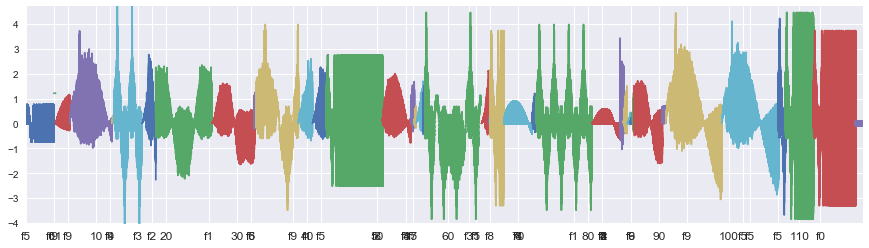

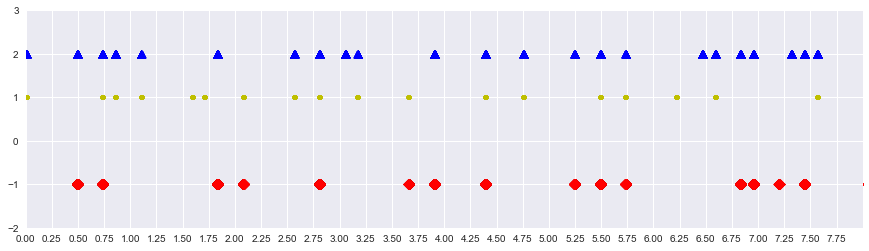

In [26]:
audio = zapar(instrumentos = ['sinte_loco', 'bateria', 'armonia'])

In [12]:
def save_audio(audio):
    os.chdir('D:\Matias\Python')
    with open('Obra Electroacustica.wav', 'wb') as t:
        t.write(audio.data)

In [395]:
#head = rb"RIFFDb\x05\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data" + rb"\x05\x00\x00\x00\x04\x08\x01\x10\xee\x17\xc2\x1fw'\x04/b6\x88=rD\x16KnQuW$]ubcg\xeak\x03p\xacs\xe1v\x9ey\xe" + rb"1{\xa7}\xef~\xb7\x7f\xfe\x7f\xc5\x7f\x0c"
#a = play(nota['A'], 4).data[98:] + play(nota['B'], 4).data[98:]     
#from io import BytesIO
#obra = wave.open(open(BytesIO(audio.data), 'r'), 'r')
#scaled = np.int16(a/np.max(np.abs(a)) * 32767)
#write('test.wav', framerate, data)